In [1]:
import pandas as pd 
from datetime import datetime, timedelta
import matplotlib as plt


In [2]:
def read_csvs():
    gift_claims = pd.read_csv('./giftclaims.csv', index_col=0)
    fans = pd.read_csv('./fans.csv', index_col=0)
    facilitators = pd.read_csv('./facilitators.csv', index_col=0)
    return gift_claims, fans, facilitators


In [3]:
def merge_datasets(gift_claims, fans, facilitators):
    
    merged = gift_claims.merge(fans, how='left', left_on='FanID', right_on='FanID')

    merged = merged.merge(facilitators, how='left', left_on='FacilitatorID', right_on='ID').drop(columns=['ID'])
    return merged


In [4]:
def weekly_summary(merged, from_date, to_date):
    from_date = datetime.strptime(from_date, "%Y-%m-%d").date() 
    to_date = datetime.strptime(to_date, "%Y-%m-%d").date()
    
    weeks = []
    date_range = []
    sign_ups = []
    
    for end_week_date in pd.date_range(from_date , to_date + timedelta(days=1), freq="7D"):
        weeks.append(end_week_date)

    for i in range(len(weeks)-1):
        date_range.append(f"{str(weeks[i].date())} to {str(weeks[i+1].date())}") 
        sign_ups.append(len(merged[pd.to_datetime(merged['Date']).between(weeks[i],  weeks[i+1])]))
        
    report = pd.DataFrame(list(zip(date_range, sign_ups)), columns=["weeks", "sign_ups"])    
    return report


In [5]:
def engagement(merged):
    
    first_claimed = merged.sort_values(['FanID','GiftClaimDate']).groupby('FanID').nth(0)

    engaged_10 = first_claimed[pd.to_datetime(first_claimed['GiftClaimDate']) - pd.to_datetime(first_claimed['Date']) < pd.Timedelta(days=11)] 
    fraction = len(engaged_10) / merged.nunique()['FanID']  
    return fraction  


In [6]:
def find_weekly_rate(merged, from_date, to_date):
    from_date = datetime.strptime(from_date, "%Y-%m-%d").date() 
    to_date = datetime.strptime(to_date, "%Y-%m-%d").date()
    weeks = []
    
    for end_week_date in pd.date_range(from_date , to_date + timedelta(days=1), freq="7D"):
        weeks.append(end_week_date)
        rates=[]
        
    for i in range(len(weeks)-1):
   
        signed_this_week = merged[pd.to_datetime(merged['Date']).between(weeks[i],  weeks[i+1])]
        first_claimed = signed_this_week.sort_values(['FanID','GiftClaimDate']).groupby('FanID').nth(0)
        if len(first_claimed) != 0: 
            engaged_this_week = first_claimed[pd.to_datetime(first_claimed['GiftClaimDate']) - pd.to_datetime(first_claimed['Date']) < pd.Timedelta(days=11)]
            rates.append(len(engaged_this_week)/ len(first_claimed))
        else:
            rates.append(0)
            
    weekly_rate = pd.DataFrame(list(zip(weeks, rates)), columns=["weeks start date", "engagement rates"])    
    return weekly_rate      
   

                       weeks  sign_ups
0   2022-02-14 to 2022-02-21     19197
1   2022-02-21 to 2022-02-28     17433
2   2022-02-28 to 2022-03-07     16011
3   2022-03-07 to 2022-03-14     14887
4   2022-03-14 to 2022-03-21     15872
5   2022-03-21 to 2022-03-28     14027
6   2022-03-28 to 2022-04-04     11921
7   2022-04-04 to 2022-04-11      9965
8   2022-04-11 to 2022-04-18      8407
9   2022-04-18 to 2022-04-25      5481
10  2022-04-25 to 2022-05-02      3407
11  2022-05-02 to 2022-05-09       993
12  2022-05-09 to 2022-05-16         0
0.29992044550517105


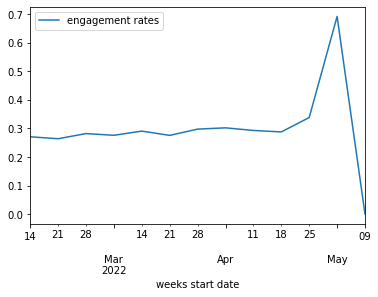

In [7]:
if (__name__ == "__main__"):
    
    #read data 
    gift_claims, fans, facilitators = read_csvs()
    
    #question One 
    merged = merge_datasets(gift_claims, fans, facilitators)
    
    #question Two
    from_date = "2022-02-14"
    to_date = "2022-05-15"
    report = weekly_summary(merged, from_date, to_date)
    print(report)
    #question Three
    engaged_fraction = engagement(merged)
    print(engaged_fraction)
    #question Four
    weekly_10_rate = find_weekly_rate(merged, from_date, to_date)
    weekly_10_rate.plot(x ='weeks start date', y="engagement rates")
    plt.pyplot.show()